In [21]:
import pandas as pd
import numpy as np

In [22]:
# load in data
data = './preprocessed_stats_22024.csv'
df = pd.read_csv(data)
df.head()

,PLAYER_ID,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,...,ROLLING_total_shots,ROLLING_total_makes,ROLLING_fg_pct,ROLLING_paint_shots,ROLLING_mid_range_shots,ROLLING_three_point_shots,ROLLING_avg_distance,position_encoded,days_since,opposing_team_numeric
0,2544,34.650000,1.233608,1.512782,0.351239,0.011294,0.398308,0.143403,-0.112656,-0.241158,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,108,0
1,2544,34.700000,1.233608,1.033081,0.704013,0.701195,0.717424,0.680328,1.859488,2.569032,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,111,1
2,2544,33.766667,2.780866,2.472183,0.728707,2.080997,1.993885,0.837826,1.366452,0.963209,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,112,2
3,2544,35.800000,-0.004199,1.192981,-0.438974,0.701195,0.717424,0.680328,0.873416,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,114,1
4,2544,28.966667,1.852511,1.033081,1.247285,0.011294,0.079193,0.440502,2.845561,2.167577,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,116,3


In [31]:
# drop players with no minutes in the game
df_clean = df.dropna()

In [32]:
for col in df_clean.columns:
    print(col)

PLAYER_ID
minutes
fieldGoalsMade
fieldGoalsAttempted
fieldGoalsPercentage
threePointersMade
threePointersAttempted
threePointersPercentage
freeThrowsMade
freeThrowsAttempted
freeThrowsPercentage
reboundsOffensive
reboundsDefensive
reboundsTotal
assists
steals
blocks
turnovers
foulsPersonal
points
plusMinusPoints
GAME_ID
SEASON_ID
TEAM_ID
GAME_ID_game
WL
MIN
PTS
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
STL
BLK
TOV
PF
PLUS_MINUS
total_shots
total_makes
fg_pct
paint_shots
mid_range_shots
three_point_shots
avg_distance
total_shots_clutch
total_makes_clutch
fg_pct_clutch
paint_shots_clutch
mid_range_shots_clutch
three_point_shots_clutch
avg_distance_clutch
efg
ts
streak
usagePercentage
ROLLING_fieldGoalsMade
ROLLING_fieldGoalsAttempted
ROLLING_fieldGoalsPercentage
ROLLING_threePointersMade
ROLLING_threePointersAttempted
ROLLING_threePointersPercentage
ROLLING_freeThrowsMade
ROLLING_freeThrowsAttempted
ROLLING_freeThrowsPercentage
ROLLING_reboundsOffensive
ROLLING_re

In [34]:
# split data
from sklearn.model_selection import train_test_split

target = ['WL']
X = df_clean.drop(columns=target)
y = df_clean[target]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (9522, 113)
Testing set size: (2381, 113)


## Binary Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

# train model
model.fit(X_train, y_train)

# test_model
y_pred = model.predict(X_test)


In [41]:
# evaluate model
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.05871728595927301
R-squared: 0.7649218253948304
Mean Absolute Error: 0.19864256473192424


In [54]:
# analyze feature weightings
coefs = model.coef_[0]

feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Magnitude'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Magnitude', ascending=False)

coef_df.to_csv('feature_weights_regression.csv', index=False)

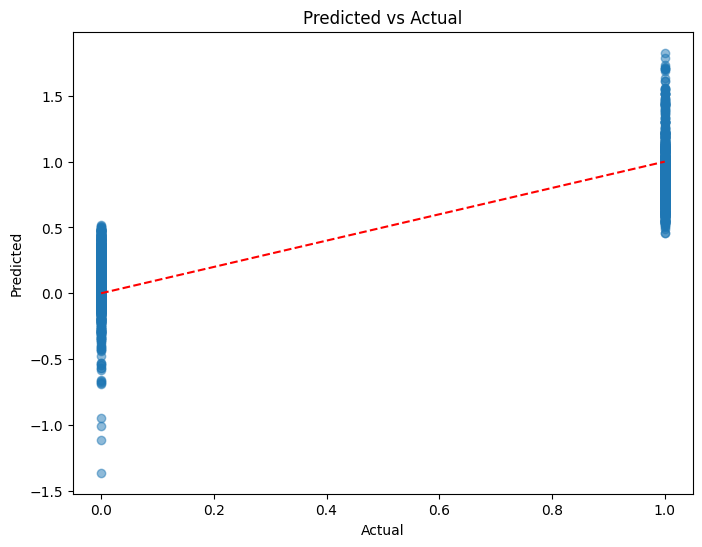

In [50]:
# plot regression
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

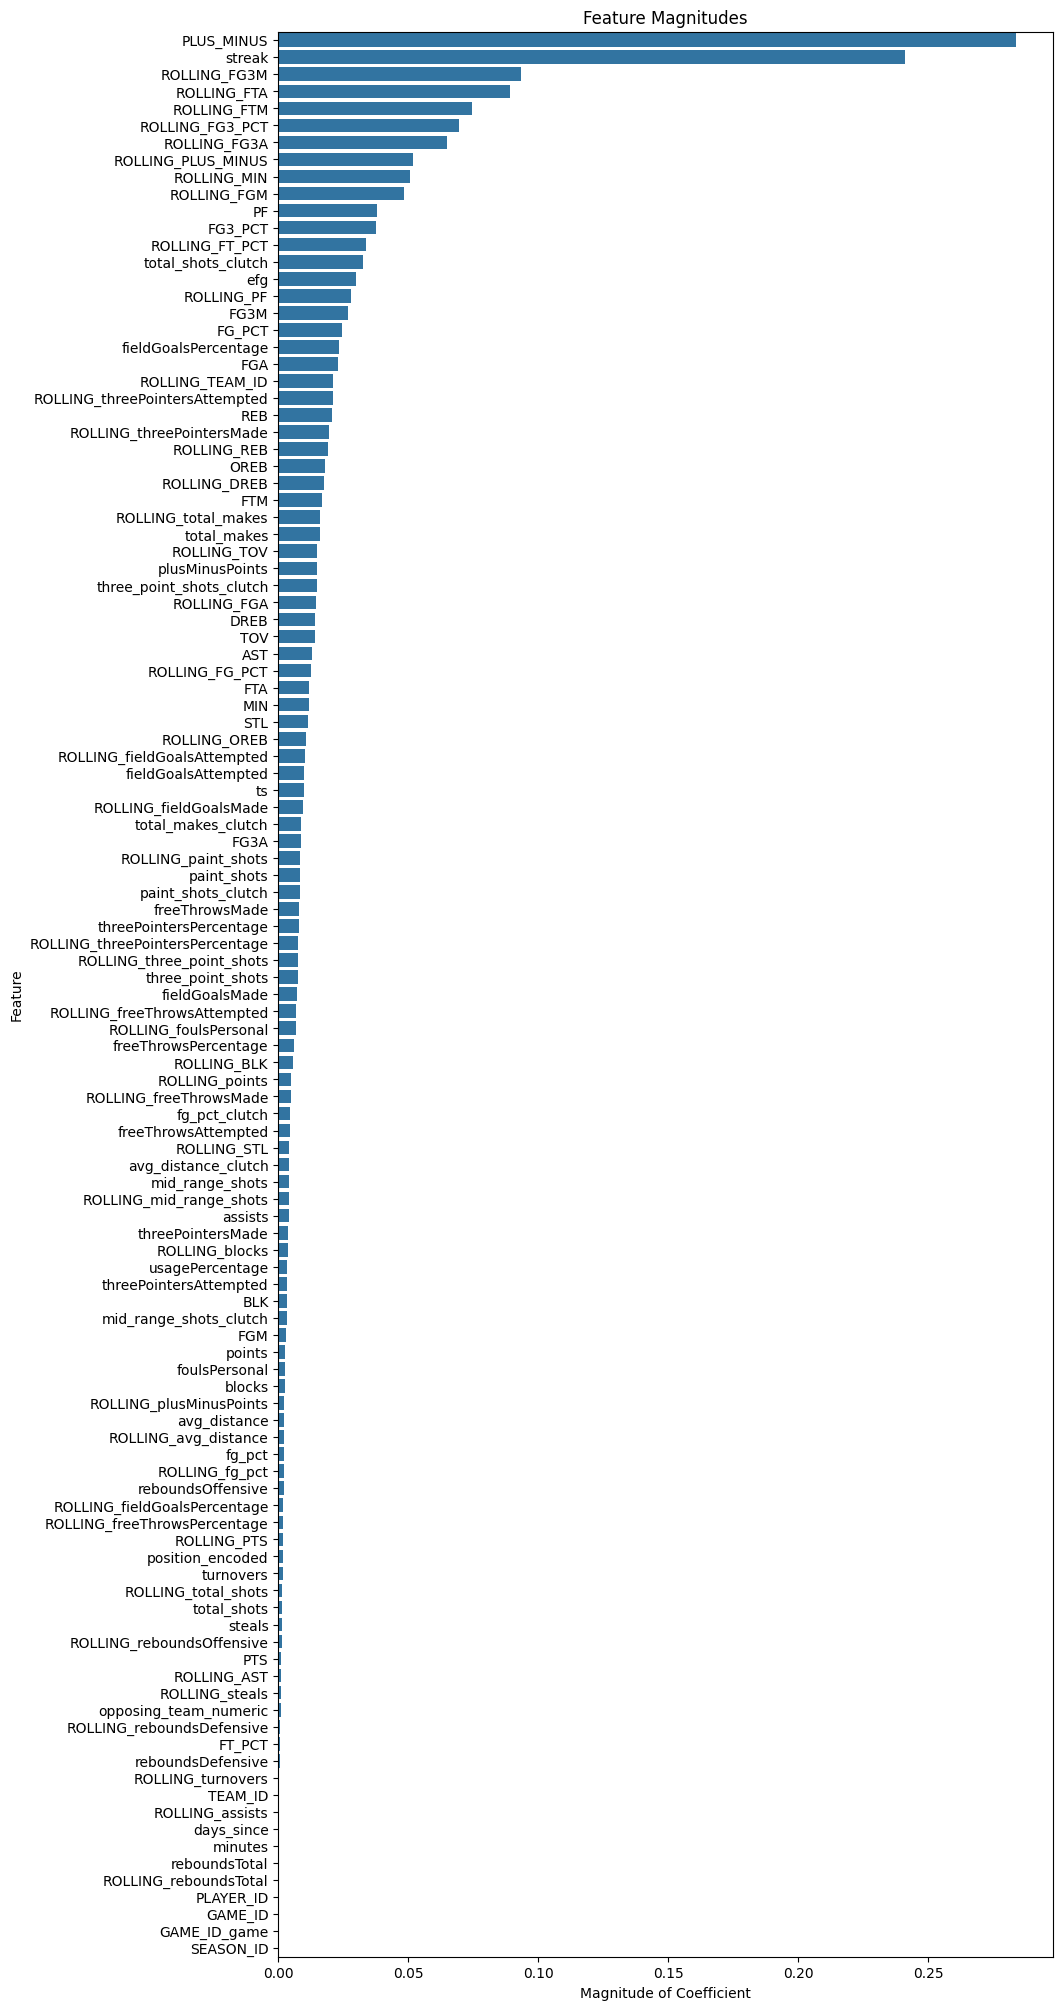

In [55]:
# plot 
import seaborn as sns

plt.figure(figsize=(10, 25))
sns.barplot(x='Magnitude', y='Feature', data=coef_df)
plt.title('Feature Magnitudes')
plt.xlabel('Magnitude of Coefficient')
plt.ylabel('Feature')
plt.show()